In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
dataset=pd.read_csv("Housing.csv")
dataset=dataset.drop(columns=["id","date","zipcode"], axis=1)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [70]:
dataset.shape

(21613, 18)

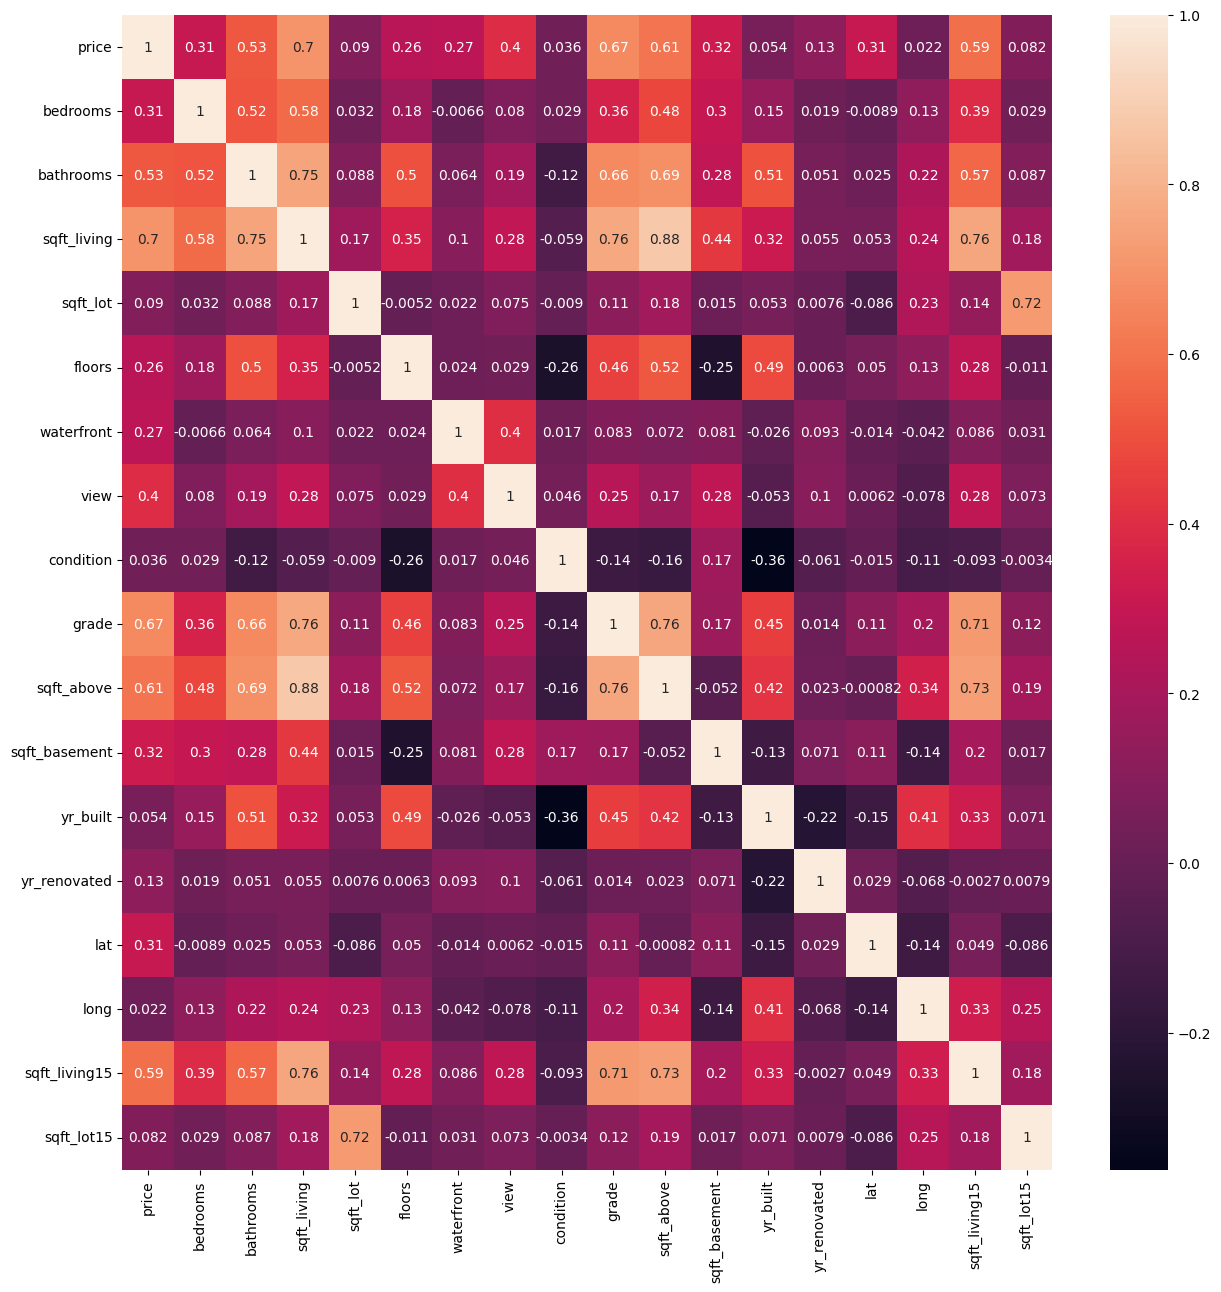

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()
# vesy is dataset pr linear regression ni lg skta but still hm isi dataset pr hi practice kryn gy regularization ki

In [72]:
x=dataset.drop("price", axis=1)
y=dataset["price"]

In [73]:
x.shape

(21613, 17)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
dataset["waterfront"].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [76]:
dataset["sqft_living"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: sqft_living
Non-Null Count  Dtype
--------------  -----
21613 non-null  int64
dtypes: int64(1)
memory usage: 169.0 KB


In [77]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [78]:
large_valued_cols=["sqft_living","sqft_lot","sqft_lot15","sqft_basement","sqft_living15","lat","yr_built","sqft_above","yr_renovated"]
ss=StandardScaler()
ss.fit(dataset[large_valued_cols])

StandardScaler()

In [79]:
ss.transform(dataset[large_valued_cols])

array([[-0.97983502, -0.22832133, -0.26071541, ..., -0.54489777,
        -0.73470764, -0.21012839],
       [ 0.53363434, -0.18988538, -0.18786773, ..., -0.6810785 ,
         0.46084084,  4.7466776 ],
       [-1.42625404, -0.12329847, -0.17237524, ..., -1.29389179,
        -1.22983377, -0.21012839],
       ...,
       [-1.15404732, -0.33213703, -0.39414129, ...,  1.29354209,
        -0.92792759, -0.21012839],
       [-0.52252773, -0.30707641, -0.42051149, ...,  1.12331618,
        -0.22750526, -0.21012839],
       [-1.15404732, -0.33875227, -0.41794772, ...,  1.25949691,
        -0.92792759, -0.21012839]])

In [81]:
data=pd.DataFrame(ss.transform(dataset[large_valued_cols]), columns=["sqft_living","sqft_lot","sqft_lot15","sqft_basement","sqft_living15","lat","yr_built","sqft_above","yr_renovated"])
data.head()

,sqft_living,sqft_lot,sqft_lot15,sqft_basement,sqft_living15,lat,yr_built,sqft_above,yr_renovated
0,-0.979835,-0.228321,-0.260715,-0.658681,-0.943355,-0.352572,-0.544898,-0.734708,-0.210128
1,0.533634,-0.189885,-0.187868,0.245141,-0.432686,1.161568,-0.681079,0.460841,4.746678
2,-1.426254,-0.123298,-0.172375,-0.658681,1.070140,1.283537,-1.293892,-1.229834,-0.210128
3,-0.130550,-0.244014,-0.284522,1.397515,-0.914174,-0.283288,-0.204446,-0.891699,-0.210128
4,-0.435422,-0.169653,-0.192849,-0.658681,-0.272190,0.409550,0.544548,-0.130895,-0.210128


In [82]:
dataset[[
    "sqft_living", "sqft_lot", "sqft_lot15", "sqft_basement",
    "sqft_living15", "lat", "yr_built", "sqft_above", "yr_renovated"
]] = data[[
    "sqft_living", "sqft_lot", "sqft_lot15", "sqft_basement",
    "sqft_living15", "lat", "yr_built", "sqft_above", "yr_renovated"
]]

In [83]:
dataset.head()  

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,-0.979835,-0.228321,1.0,0,0,3,7,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-122.257,-0.943355,-0.260715
1,538000.0,3,2.25,0.533634,-0.189885,2.0,0,0,3,7,0.460841,0.245141,-0.681079,4.746678,1.161568,-122.319,-0.432686,-0.187868
2,180000.0,2,1.00,-1.426254,-0.123298,1.0,0,0,3,6,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-122.233,1.070140,-0.172375
3,604000.0,4,3.00,-0.130550,-0.244014,1.0,0,0,5,7,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-122.393,-0.914174,-0.284522
4,510000.0,3,2.00,-0.435422,-0.169653,1.0,0,0,3,8,-0.130895,-0.658681,0.544548,-0.210128,0.409550,-122.045,-0.272190,-0.192849


In [84]:
x=dataset.drop("price", axis=1)
y=dataset["price"]

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [90]:
x_train.shape , x_test.shape

((15129, 17), (6484, 17))

In [93]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge 

<h1> for linear regression </h1>

In [94]:
lr=LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [96]:
lr.score(x_test, y_test)*100

69.45821842245796

In [122]:
lr.coef_

array([-3.29018745e+04,  4.11608541e+04,  1.54333887e+17,  3.80531918e+03,
       -3.02709430e+02,  5.51055917e+05,  5.18711804e+04,  2.73585467e+04,
        9.59690320e+04, -1.39151578e+17, -7.43698664e+16, -7.17670426e+04,
        9.56130925e+03,  7.70664840e+04, -1.02609585e+05,  1.47806628e+04,
       -9.18842117e+03])

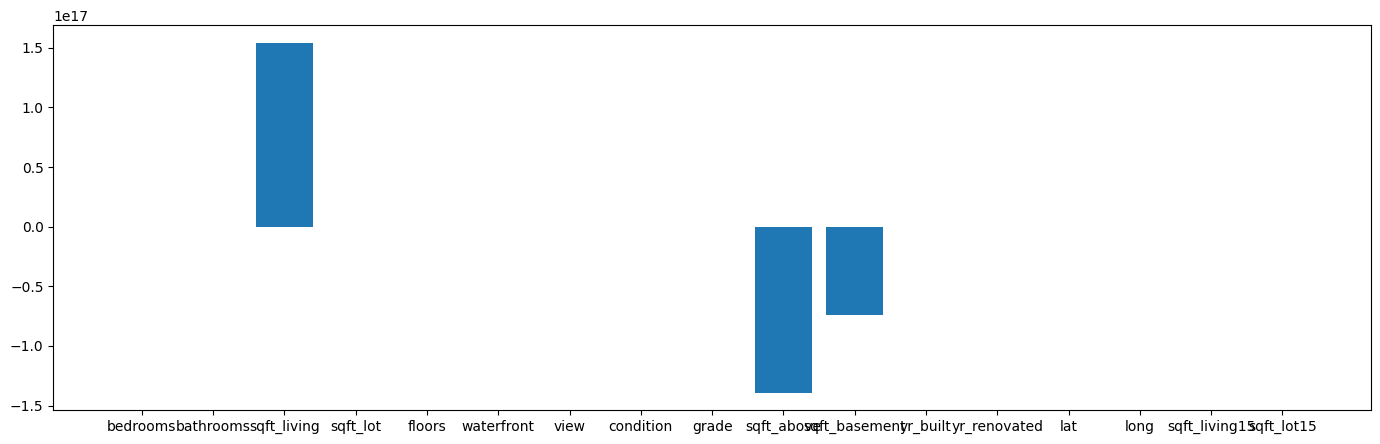

In [121]:
plt.figure(figsize=(17,5))
plt.bar(x.columns, lr.coef_)
plt.show()

<h1> for Lasso regression </h1>

In [132]:
la=Lasso(alpha=2)   #ab hm n alpha=2 de ke "m" ki value change ki or phir dekhyn gy k 
# kia is baar updated "m" pr jo line bny gi vo achi prediction de gi ya nhi
la.fit(x_train, y_train)

C:\Users\J11\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.834e+13, tolerance: 1.977e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2)

In [133]:
la.score(x_test, y_test)*100

69.45620376837356

In [124]:
la.coef_

array([-3.27383676e+04,  4.14219449e+04,  2.54423632e+05,  3.80483328e+03,
       -3.43780233e+02,  5.50303083e+05,  5.19032446e+04,  2.73650389e+04,
        9.60063624e+04, -7.80649980e+04, -5.67088892e+04, -7.17753823e+04,
        9.57227572e+03,  7.70324892e+04, -1.02431709e+05,  1.47606312e+04,
       -9.17252080e+03])

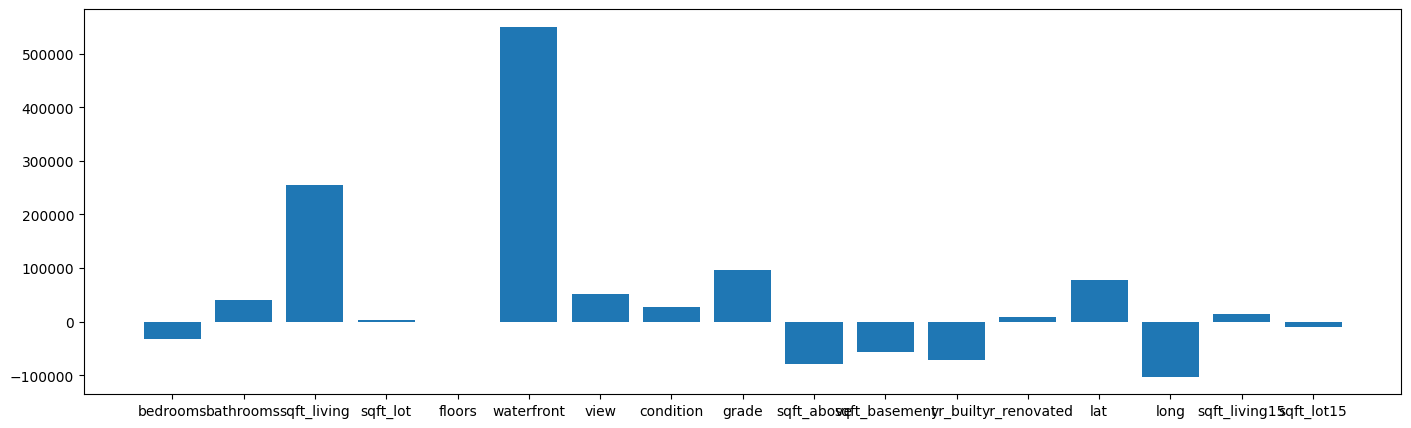

In [123]:
plt.figure(figsize=(17,5))
plt.bar(x.columns, la.coef_)
plt.show()

<h1> for Ridge regression </h1>

In [112]:
ri=Ridge(alpha=2)
ri.fit(x_train, y_train)

Ridge(alpha=2)

In [114]:
ri.score(x_test, y_test)*100

69.4420832972367

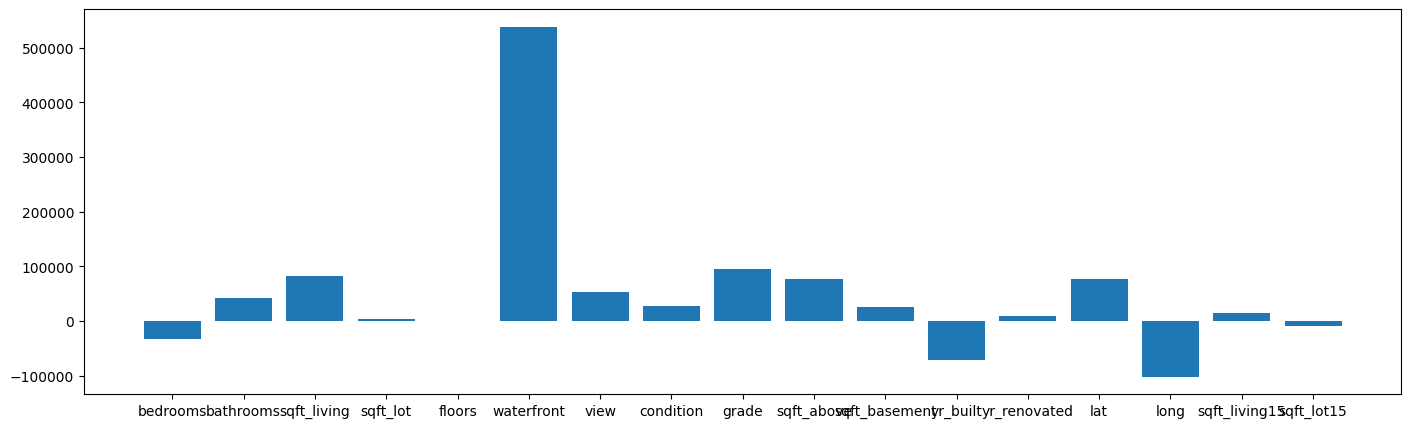

In [125]:
plt.figure(figsize=(17,5))
plt.bar(x.columns, ri.coef_)
plt.show()

In [127]:
comparison=pd.DataFrame({"cols_name":x.columns, "regression":lr.coef_, "lasso":la.coef_, "ridge": ri.coef_})
comparison.head()

# yani kuch kuch dekha ja skta h k linear regression n hi achi accuracy di, accuracy is loye bhi km ai q k 
# y dataset linear regression ko follow nhi krta q k in m linear relationship nhi h,, mujy esa koi dataset mila nhi, it is 
# just for practice, hm mazeed alpha ki value m chnages kr k bhi dekh skty hn k kab achi accuracy mily gi

,cols_name,regression,lasso,ridge
0,bedrooms,-3.290187e+04,-32738.367574,-32783.271568
1,bathrooms,4.116085e+04,41421.944922,41444.574255
2,sqft_living,1.543339e+17,254423.632001,82255.512084
3,sqft_lot,3.805319e+03,3804.833278,3789.984216
4,floors,-3.027094e+02,-343.780233,-308.839248
